In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [3]:
base_dir = Path('/media/external/tcc_work')
base_dir.cwd()

PosixPath('/media/external/tcc_work/code')

In [4]:
csv_path = base_dir / 'jsteg_features_label.csv'
df_data = pd.read_csv(csv_path, names=['filename', 'average distance', 'l2 distance', 'structure content', 'image fidelity', 'n cross correlation', 'nmse', 'psnr', 'label'])
print(df_data.shape)
del df_data['filename']
df_data

(5113, 9)


,average distance,l2 distance,structure content,image fidelity,n cross correlation,nmse,psnr,label
0,56.931707,0.766108,0.977053,0.673182,1.075571,0.334493,24.429944,1
1,61.668783,0.830125,1.001930,0.808079,1.143870,0.191552,32.460343,0
2,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,361.201999,0
3,129.196971,1.154495,0.994355,0.173871,1.175155,0.830818,21.093058,0
4,64.737274,0.846629,0.985915,0.790668,1.060851,0.212322,30.039491,0
...,...,...,...,...,...,...,...,...
5108,95.263112,1.016418,0.994516,0.619627,1.100389,0.382470,25.548389,1
5109,14.915268,0.413426,0.996841,0.983825,1.015888,0.016226,44.389046,0
5110,122.644246,1.129903,0.968373,0.249849,1.166975,0.774651,21.840372,1
5111,108.637075,1.091126,0.986380,0.561347,1.168969,0.444710,26.456649,0


In [5]:
arr = df_data.to_numpy()
X = arr[:, :7]
y = arr[:, 7]

print(X)

[[5.69317067e+01 7.66108162e-01 9.77053467e-01 ... 1.07557061e+00
  3.34493247e-01 2.44299442e+01]
 [6.16687826e+01 8.30125389e-01 1.00192974e+00 ... 1.14387005e+00
  1.91551508e-01 3.24603431e+01]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 3.61201999e+02]
 ...
 [1.22644246e+02 1.12990260e+00 9.68372661e-01 ... 1.16697535e+00
  7.74651422e-01 2.18403722e+01]
 [1.08637075e+02 1.09112625e+00 9.86380385e-01 ... 1.16896870e+00
  4.44710217e-01 2.64566488e+01]
 [5.77819010e+01 8.13644929e-01 9.97008073e-01 ... 1.09193123e+00
  6.14162624e-02 3.81704801e+01]]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#print(X_train.dtype)
#print(y_train.dtype)
#clf = svm.SVC()

clf = make_pipeline(StandardScaler(), SVC(C=1.0, kernel='poly', gamma='scale'))

# clf = make_pipeline(StandardScaler(), SVC())
#clf = RandomForestClassifier()
clf.fit(X_train, y_train)

score = clf.score(X_test, y_test)
print(score)

0.5202086049543677


Confusion Matrix
[[252 527]
 [209 546]]
Test Set: 1534
Accuracy = 52.02086049543677 %


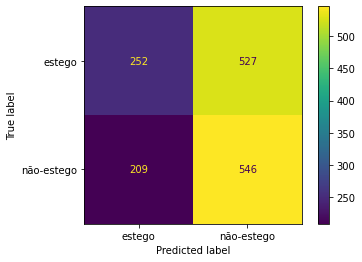

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
predictions = clf.predict(X_test)
res = confusion_matrix(y_test, predictions)
percentage = clf.score(X_test, y_test)
print("Confusion Matrix")
print(res)
print(f"Test Set: {len(X_test)}")
print(f"Accuracy = {percentage*100} %")
ConfusionMatrixDisplay.from_predictions(y_test, predictions, display_labels=["estego", "não-estego"])